In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from keras.optimizers import rmsprop_v2
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def create_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(100,100,1), activation="relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer=rmsprop_v2.RMSProp(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [3]:
batch_size = 32

train_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/',
    image_size=(100,100),
    validation_split=0.2,
    color_mode='grayscale',
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
    seed=123
)

Found 291472 files belonging to 43 classes.
Using 233178 files for training.


2022-06-06 21:25:20.311954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 21:25:20.344282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 21:25:20.344453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 21:25:20.345266: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 291472 files belonging to 43 classes.
Using 58294 files for validation.


In [4]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [5]:
learning_model = create_model(num_classes=43)

In [6]:
epochs = 10
learning_model.summary()
history = learning_model.fit(train_data,steps_per_epoch=len(train_data),validation_data=val_data,validation_steps=len(val_data),epochs=epochs, callbacks=[learning_rate_reduction])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 64)        3

2022-06-06 21:25:31.255032: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400


7287/7287 [==============================] - 1007s 138ms/step - loss: 0.4832 - accuracy: 0.8708 - val_loss: 1.7074 - val_accuracy: 0.5021 - lr: 0.0010
Epoch 2/10
7287/7287 [==============================] - 553s 76ms/step - loss: 0.4406 - accuracy: 0.8912 - val_loss: 2.4077 - val_accuracy: 0.3474 - lr: 0.0010
Epoch 3/10
7287/7287 [==============================] - 542s 74ms/step - loss: 0.4818 - accuracy: 0.8895 - val_loss: 0.8745 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 4/10
7287/7287 [==============================] - 560s 77ms/step - loss: 0.6435 - accuracy: 0.8660 - val_loss: 0.3321 - val_accuracy: 0.9162 - lr: 0.0010
Epoch 5/10
7287/7287 [==============================] - 537s 74ms/step - loss: 0.7375 - accuracy: 0.8388 - val_loss: 0.4044 - val_accuracy: 0.8904 - lr: 0.0010
Epoch 6/10
7287/7287 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.8611
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
7287/7287 [========================

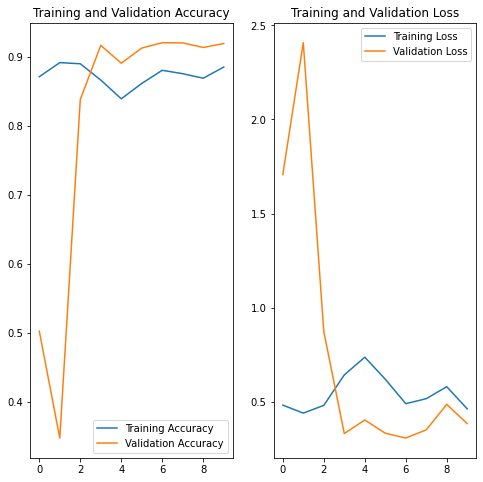

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
image = tf.keras.preprocessing.image.load_img('6.jpg', color_mode='grayscale')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
arr = learning_model.predict(input_arr)
print(str(np.argmax(arr[0])) + " " + str(arr[0][np.argmax(arr)] * 100))

4 84.7982108592987


In [9]:
learning_model.save("test_modelv4.h5")